In [1]:
import uxarray as ux
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os,sys
import OpenVisus as ov
import openvisuspy as ovp
import xarray as xr
from tqdm import tqdm
import time
from sys import getsizeof
import cmocean
import easygems.healpix as egh


In [2]:
# !pip install OpenVisus openvisuspy boto3 xmltodict colorcet

In [3]:
idx_filename=f"./idx/conus404_eastward_wind.idx"

def get_size_in_mb(variable):
  """
    Calculates the size of a variable in megabytes (MB).

    Args:
        variable: The variable to check the size of.

    Returns:
        The size of the variable in MB.
  """
  size_in_bytes = sys.getsizeof(variable)
  size_in_mb = size_in_bytes / (1024 * 1024)
  return size_in_mb


In [4]:
db=ov.LoadDataset(idx_filename)

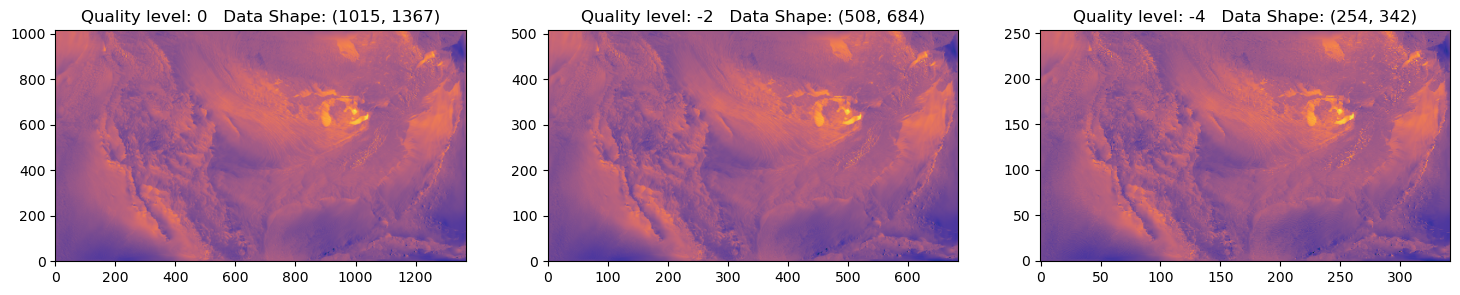

3


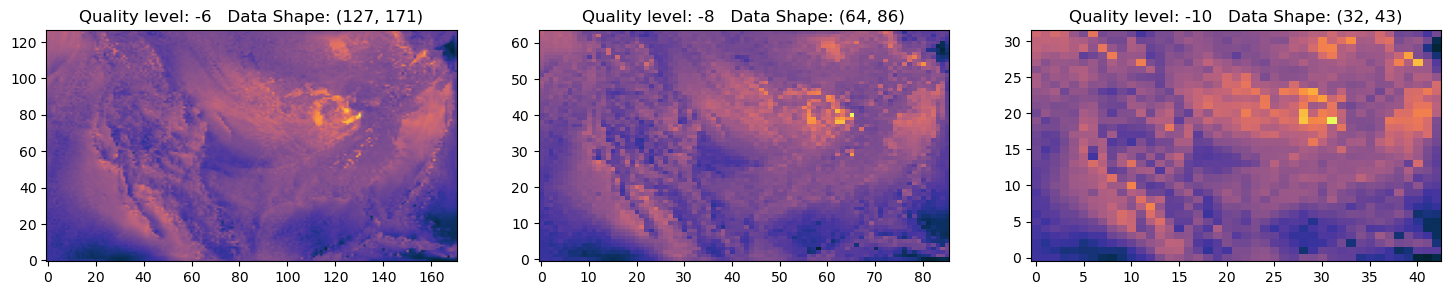

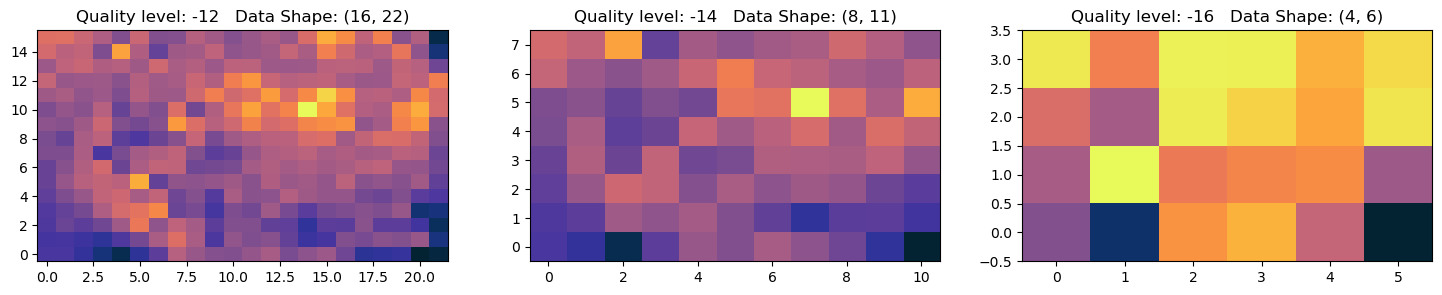

In [5]:
time_to_read_idx=[]
quality=[0,-2,-4,-6,-8,-10,-12,-14,-16]
fig, axs = plt.subplots(1, 3, figsize=(18, 3))
for ax,q in zip(axs,quality[0:3]):
    start_time=time.time()
    data=db.read(quality=q)
    end_time=time.time()
    total_time=end_time-start_time
    time_to_read_idx.append(total_time)
    ax.imshow(data,origin='lower',cmap=cmocean.cm.thermal,aspect='auto')
    ax.set_title(f'Quality level: {q}   Data Shape: {data.shape}')
plt.show()

print(len(time_to_read_idx))
fig, axs = plt.subplots(1, 3, figsize=(18, 3))
for ax,q in zip(axs,quality[3:6]):
    start_time=time.time()
    data=db.read(quality=q)
    end_time=time.time()
    total_time=end_time-start_time
    time_to_read_idx.append(total_time)    
    ax.imshow(data,origin='lower',cmap=cmocean.cm.thermal,aspect='auto')
    ax.set_title(f'Quality level: {q}   Data Shape: {data.shape}')
plt.show()
fig, axs = plt.subplots(1, 3, figsize=(18, 3))
for ax,q in zip(axs,quality[6:9]):
    start_time=time.time()
    data=db.read(quality=q)
    end_time=time.time()
    total_time=end_time-start_time
    time_to_read_idx.append(total_time)    
    ax.imshow(data,origin='lower',cmap=cmocean.cm.thermal,aspect='auto')
    ax.set_title(f'Quality level: {q}   Data Shape: {data.shape}')
plt.show()


Text(0.5, 1.0, 'Time vs quality')

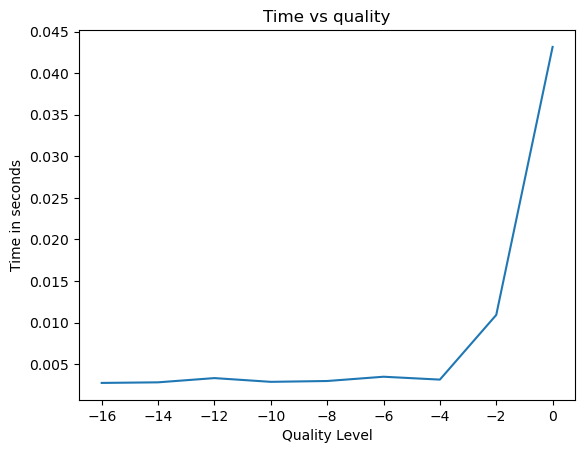

In [6]:
plt.plot(quality,time_to_read_idx)
plt.xlabel('Quality Level')
plt.ylabel('Time in seconds')
plt.title('Time vs quality')

ValueError: nside must be a positive integer 1 <= nside <= 2^29

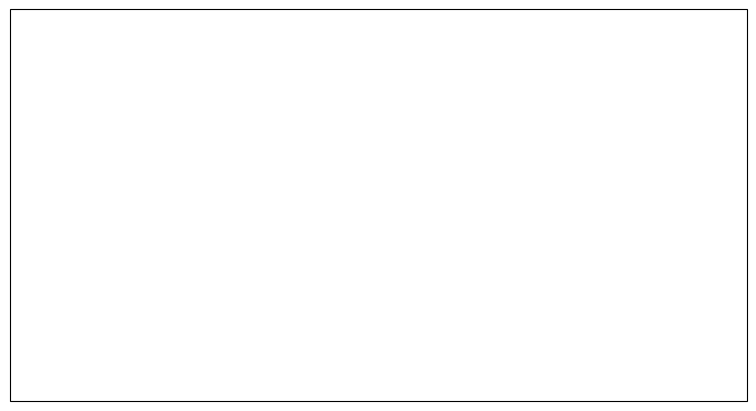

In [7]:
projection = ccrs.Robinson(central_longitude=-100)
fig, ax = plt.subplots(
    figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
)
ax.set_extent([-135, -60, 20, 55], crs=ccrs.PlateCarree())

egh.healpix_show(data, ax=ax, cmap=cmocean.cm.thermal)
ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)